**Fourier Transform**

A Mathematical Operation That Decomposes A Function Or Signal,Such As Time x(t),Into Its Constituent Frequencies X(ω) Converting Data From The Time Or Spatial Domain To The Frequency Domain.

1. Discrete Fourier Transform (DFT)

Converts A Finite Sequence Of Equally Spaced Time Domain Samples Into A Sequence Of Frequency Domain Components.


Steps:-

1.fs: Sample Signal At 1000 Hz (1000 Samples Per Second)

t_duration:Total Duration Of The Signal Is 1 second

t: An Array Of 1000 Evenly Spaced Values Between [0,1) Second.

2. N->len(t): Number Of Samples (1000 In This Case).

yf: fft(signal) Computes The FFT Of The Signal Converts It From Time Domain To Frequency Domain.

xf: fftfreq(N, 1/fs) Generates The Corresponding Frequency Values For Plotting.



In [1]:
#Implementation
import numpy as np, matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq

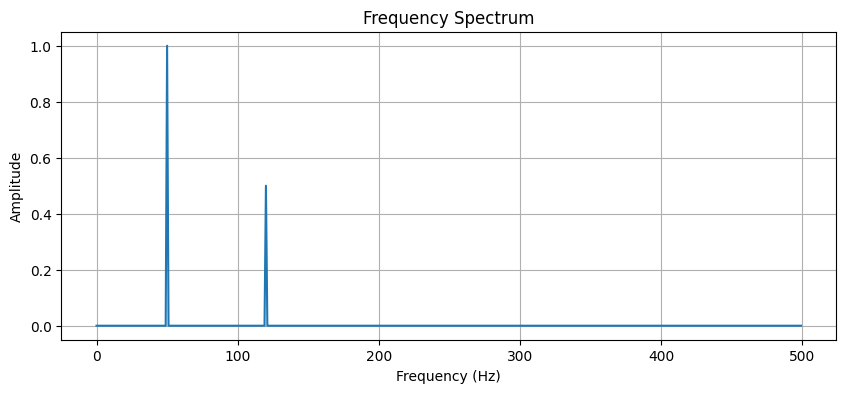

In [9]:
#Creating The Time Domain Signal
fs=1000
t_duration=1.0
t=np.linspace(0,t_duration,int(fs*t_duration),endpoint=False) #Time Vector
signal=np.sin(2*np.pi*50*t)+0.5*np.sin(2*np.pi*120*t)
#Applying DFT
N=len(t) #Number Of Samples:1000 Δf=fs/N​​
yf=fft(signal) #Computes FFT
xf=fftfreq(N,1/fs) #Generates Frequency And Maps Each Into : fk​=(k/N)*fs​
xf=xf[:N//2] #Dividing In Half
#DFT Is Conjugate Symmeteric;The Negative Frequency Don't Add New Info
yf=2.0/N*np.abs(yf[:N//2])
#Keeps Positive Frequency Half And Converts Complex FFT Output To Magnitude
#Plotting The Frequency Spectrum
plt.figure(figsize=(10,4))
plt.plot(xf,yf)
#xf:Frequency Axis (Hz),From 0-fs/2
#Single-Sided Amplitude Spectrum
plt.title("Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

2. Fast Fourier Transform (FFT)

In [ ]:
x=np.array([1,2,3,4])
print(fft(x))
print()
#Using Zero-Padding With n-Parameter
print(fft(x,n=8))
print()
#Applying FFT Along A Specific Axis Of A 2D Array
print(fft(x,axis=0))

In [ ]:
#Creating A Time Vector
t=np.linspace(0,1,100,endpoint=False) #1 Second,100 Samples
#Composite Signal : sine+cosine
x=np.sin(2*np.pi*5*t)+0.5*np.cos(2*np.pi*10*t)
#Applying FFT
y=fft(x)
print("FFT Output (First 10 Samples):")
for i in range(10):
  print(f"Frequencies:{i}:{y[i].real:.2f}+{y[i].imag:.2f}j")

3. Inverse Fast Fourier Transform

Reconstructing Signal And Plot

Reconstructed Signal (1st 10 Samples): [0.5  0.71 0.74 0.65 0.55 0.5  0.55 0.65 0.74 0.71]



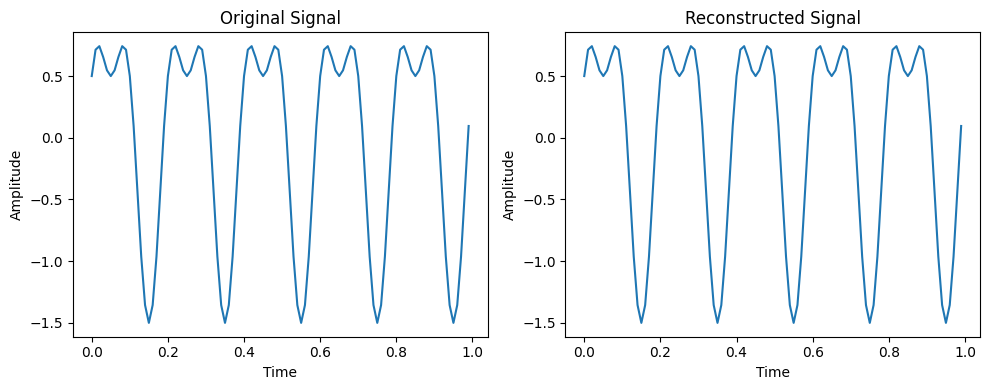

In [10]:
#Creating A Time Vector
t=np.linspace(0,1,100,endpoint=False)
#Composite Signal : sine+cosine
x=np.sin(2*np.pi*5*t)+0.5*np.cos(2*np.pi*10*t)
#Applying FFT And Inverse FFT
y=fft(x)
x_recons=ifft(y)
print("Reconstructed Signal (1st 10 Samples):",
      np.round(x_recons.real[:10],2))
print()
#Plotting
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(t,x)
plt.title("Original Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
#Reconstructed Signal
plt.subplot(1,2,2)
plt.plot(t,x_recons.real)
plt.title("Reconstructed Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()